In [2]:
from vina import Vina
from openbabel import openbabel as ob
from openbabel import pybel as pb
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors, Draw
import time
import rdkit
import matplotlib.pyplot as plt
import random
import math
import re
import os
import numpy as np
from rdkit.Chem import RDConfig
import sys
sys.path.append(os.path.join(RDConfig.RDContribDir, "SA_Score"))
import sascorer
import rdkit.Chem
import utils as utils
from rdkit import RDLogger
import importlib
importlib.reload(utils)
import mcsa
importlib.reload(mcsa)



<module 'mcsa' from '/home/red_fleet/cb/denovo-frag/mcsa.py'>

In [363]:
RDLogger.DisableLog('rdApp.*')

In [413]:
len(s.getSmilesIdx('n1(c(nnc1)S)c1cnccc1'))

12

In [7]:
def fun(a, b):
    print(a, b)

In [9]:
fun(a= 10)

TypeError: fun() missing 1 required positional argument: 'b'

In [2]:
import re

In [3]:
re.sub(r'\s+', '', "sdf sdf")

'sdfsdf'

In [311]:
f_file = open("frags.smi")
frags = f_file.read().split("\n")
frags = [re.sub(r'\s+', '', frag) for frag in frags if '.' not in frag]

In [317]:
frags = [smi for smi in frags if len(smi)<=20]
len(frags)

937

In [524]:
vina = Vina()

s = mcsa.SimulatedAnnealing(fragments=frags, vina=vina)
name = "7d9o"
center, size = getGridFromLigand(f"/home/red_fleet/cb/programs/protien_seprate/out_folder/{name}/{name}_lig.pdb", 'pdb')
s.setTarget(target_pdbqt_path=f'/home/red_fleet/cb/programs/protien_seprate/out_folder/{name}/{name}.pdbqt', grid_param=(None, center, size))

Computing Vina grid ... done.


In [5]:
getGridFromLigand(f"/home/red_fleet/cb/programs/protien_seprate/out_folder/7d9o/7d9o_lig.pdb", 'pdb')

(array([-13.5265, -43.287 ,  27.2615]), array([23.975, 20.   , 20.717]))

In [1]:
center, size

NameError: name 'center' is not defined

In [486]:
result = []

In [525]:
for i in range(1):
    r, d = s.simulatedAnnealing(ligand='', 
                                    start_score=0,  
                                    initial_building_position=center, 
                                    max_mw=500, 
                                    temp=10, 
                                    end_prob=1,
                                    vina_score_weight=0.9,
                                    max_iter_at_state = 100)
    result.append((r, d))

Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing local search ... done.
Performing loc

In [526]:
result[-1]

(<rdkit.Chem.rdchem.Mol at 0x7ff102ab7eb0>,
 {'total_frag_screened': 1274,
  'total_frag_rejected_mpc': 21,
  'state_details': [{'added_frag': 'c1(occc1)CCC(NC)C',
    'in_ligand': '',
    'out_ligand': 'c1(occc1)CCC(NC)C',
    'total_score': -3.5068488993727587,
    'vina_score': -4.74,
    'sa_score': 7.591511006272416},
   {'added_frag': 'N1C(=O)CCC1CCC(=O)O',
    'in_ligand': 'c1(occc1)CCC(NC)C',
    'out_ligand': 'c1(occc1)CCC(NC)CN1C(=O)CCC1CCC(=O)O',
    'total_score': -1.6562391531150715,
    'vina_score': -2.613,
    'sa_score': 6.954608468849288},
   {'added_frag': 'N1CC(C)(C)CCC1',
    'in_ligand': 'c1(occc1)CCC(NC)CN1C(=O)CCC1CCC(=O)O',
    'out_ligand': 'c1(occc1)CCC(NC)CN1C(=O)CCC1CCC(=O)ON1CC(C)(C)CCC1',
    'total_score': -1.599199203061023,
    'vina_score': -2.624,
    'sa_score': 7.624007969389774},
   {'added_frag': 'C(C(=O)O)C1(O)CCCCC1',
    'in_ligand': 'c1(occc1)CCC(NC)CN1C(=O)CCC1CCC(=O)ON1CC(C)(C)CCC1',
    'out_ligand': 'c1(occc1)CCC(NC)CN1C(=O)CCC1CCC(=O)ON1

In [505]:
result = result[10:20]

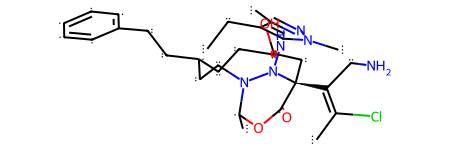

In [519]:
result[-1][0]

In [514]:
vina.set_ligand_from_string(s.rdkitToPdbqt(result[-1][0]))
vina.dock(n_poses=1)

Performing docking (random seed: 112027414) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1       -8.509          0          0


In [527]:
with open('test_out.pdbqt', 'w') as f:
    f.write(s.rdkitToPdbqt(result[-1][0]))

In [ ]:
# generating 100 ligands
lig_out_dir = f"results/{name}"
try:os.mkdir(lig_out_dir)
except : pass

count = 100
f_result = open(f"{lig_out_dir}/scores.txt", 'a')

scores = []
for i in range(0,count):
    try:
        result = s.simulatedAnnealing(ligand='', 
                                start_score=0, 
                                ligand_3d=None, 
                                initial_building_position=center, 
                                max_mw=300, 
                                temp=300, 
                                chain_prob=0.7)
        
        if result == None:
            continue

        vina.set_ligand_from_string(s.rdkitToPdbqt(result[0]))
        vina.dock(n_poses=1)
        dockend_energy = vina.energies()[0][0]

        vina.write_poses(os.path.join(lig_out_dir, f'{i}.pdbqt'), n_poses=1, overwrite=True)
        #f_result.write(f'{i}.pdbqt,{dockend_energy},{result[2]}\n')
        f_result.write(f'{i}.pdbqt: {dockend_energy}\n')
        f_result.flush()
        print(f'{i}.pdbqt,docked = {dockend_energy}, undocked = {result[2]}')
        
    except Exception as e:
        print(e)
        pass
    
    
f_result.close()

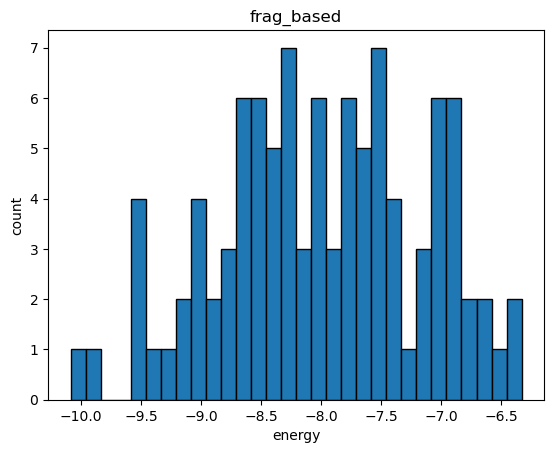

In [23]:
import matplotlib.pyplot as plt
f_data = open(f"results/{name}/scores.txt")
lines = f_data.readlines()
f_data.close()
values = [float(s.split()[1]) for s in lines if len(s.split())>0 and len(s)>0]
# Create histogram
plt.hist(values, bins=30, edgecolor='black')  # Adjust the number of bins as needed

# Add labels and title
plt.xlabel('energy')
plt.ylabel('count')
plt.title('frag_based')

# Show plot
plt.show()

In [293]:
result = s.simulatedAnnealing(ligand='', 
                              start_score=0, 
                              ligand_3d=None, 
                              initial_building_position=[16, -40, 8], 
                              max_mw=500, 
                              temp=300, 
                              coolingSchedule=coolingSchedule,
                              chain_prob=0.5)

[16:40:28] Explicit valence for atom # 16 O, 3, is greater than permitted
[16:40:28] Can't kekulize mol.  Unkekulized atoms: 17 27 28 29 30
[16:40:28] Can't kekulize mol.  Unkekulized atoms: 23 24 25
[16:40:28] SMILES Parse Error: ring closure 1 duplicates bond between atom 16 and atom 17 for input: 'c1(sc(nn1)N)c1c(OC(C(C1(C(=C(C(=CC1c1ccc(cc1)F)c1ccccc1)C#N)N)(C#N)C#N))C)cccc1'
[16:40:28] Explicit valence for atom # 4 N, 6, is greater than permitted
[16:40:28] Can't kekulize mol.  Unkekulized atoms: 25 26 27
[16:40:28] Explicit valence for atom # 16 C, 5, is greater than permitted
[16:40:28] Can't kekulize mol.  Unkekulized atoms: 6 7 11 12 13 14 15 21 22 23 25 37 38 39 40
[16:40:28] Can't kekulize mol.  Unkekulized atoms: 17 28 29 33 34 35 36
[16:40:28] Can't kekulize mol.  Unkekulized atoms: 18 19 20
[16:40:28] Can't kekulize mol.  Unkekulized atoms: 17 18 19 20 21
[16:40:28] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
[16:40:28] Can't kekulize mol.  Unkekulized atoms: 3

In [79]:
result = r

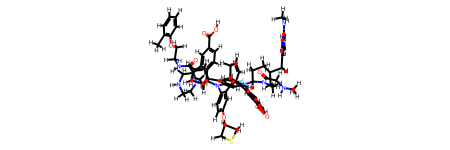

In [80]:
result[0]

In [81]:
Descriptors.HeavyAtomMolWt(result[0])

1171.9079999999992

In [ ]:
pdb = s.rdkitToPdbqt(result[0])

f = open('simple.pdbqt', 'w')
f.write(pdb)
f.close()

In [296]:
vina.set_ligand_from_string(s.rdkitToPdbqt(result[0]))
# vina.optimize()

In [138]:
vina.write_pose("ulig11.pdbqt")

SyntaxError: invalid syntax (3473949686.py, line 2)

In [84]:
vina.score()

RuntimeError: 

Vina runtime error: The ligand is outside the grid box. Increase the size of the grid box or center it accordingly around the ligand.


In [83]:
vina.dock(n_poses=1)

Performing docking (random seed: 780876452) ... 
0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1          956          0          0


In [ ]:
vina.write_poses('out.pdbqt', n_poses=1, overwrite=True)

In [299]:
vina.energies()

array([[ -8.767, -12.61 ,  -0.717,   3.844,  -0.717]])

In [141]:
vina.write_pose("lig11.pdbqt")

In [121]:
def read_pdbqt(filename):
    mol = next(pb.readfile("pdbqt", filename))
    return Chem.MolFromMolBlock(mol.write("mol"))

In [122]:
mol = read_pdbqt("lig6.pdbqt")

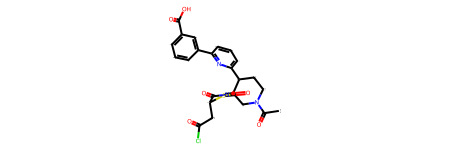

In [123]:
mol

In [142]:
c = mol.GetConformer()

In [144]:
for i in range(c.GetNumAtoms()):
    pos = c.GetAtomPosition(i)
    print(pos.x, pos.y, pos.z)

23.224 -41.728 9.705
24.658 -41.539 9.373
25.559 -42.694 9.631
24.941 -43.966 9.407
25.68 -45.014 8.825
25.16 -46.132 8.622
27.09 -44.8 8.447
23.582 -44.171 9.779
22.635 -43.081 9.433
22.056 -43.206 8.084
22.851 -43.155 6.939
24.084 -43.042 6.758
21.732 -43.291 5.545
20.355 -43.976 6.553
20.681 -43.379 7.853
19.776 -43.057 8.679
20.6 -45.483 6.569
19.344 -46.239 6.462
18.372 -45.807 7.057
19.172 -47.716 5.533
21.262 -40.224 9.494
20.547 -39.207 8.953
21.127 -38.537 7.903
22.394 -38.892 7.421
23.017 -39.933 8.044
22.461 -40.627 9.101
19.233 -38.869 9.476
18.891 -37.631 9.924
17.618 -37.336 10.42
16.666 -38.315 10.463
16.991 -39.579 10.013
18.254 -39.843 9.529
17.334 -35.993 10.882
16.574 -35.85 11.874
17.867 -34.859 10.272


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
f = open("result.txt")

energy = []
for line in f.readlines():
    if line == "": continue
    energy.append(float(line.split(',')[1]))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Binding affinity')

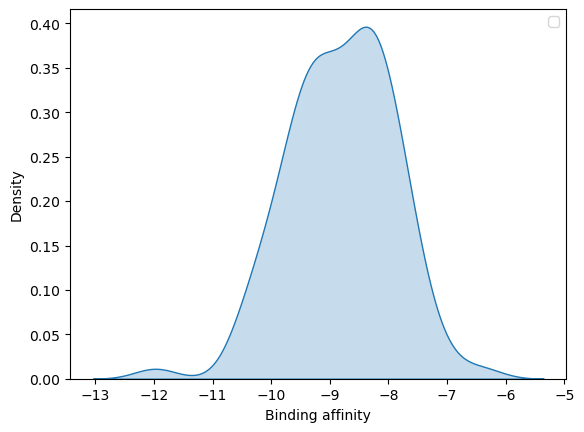

In [19]:
sns.kdeplot(energy, fill=True)
plt.legend()
plt.xlabel('Binding affinity')

<Axes: ylabel='Count'>

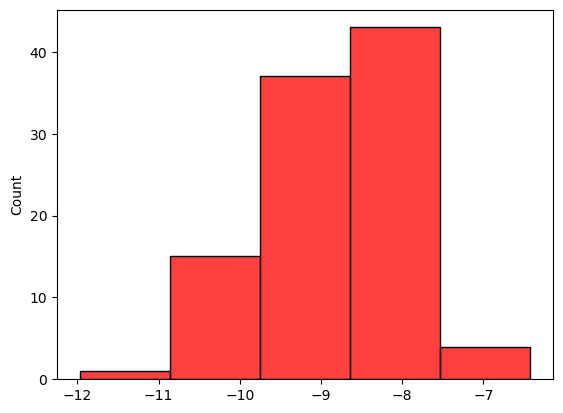

In [17]:
sns.histplot(energy, fill=True, color='red', label='vina', bins=5)

In [14]:
energy

['-9.525',
 '-9.029',
 '-9.486',
 '-9.573',
 '-9.347',
 '-8.671',
 '-9.113',
 '-7.696',
 '-7.958',
 '-8.588',
 '-9.241',
 '-8.564',
 '-8.365',
 '-7.954',
 '-7.735',
 '-8.773',
 '-8.471',
 '-10.268',
 '-6.419',
 '-8.165',
 '-9.353',
 '-9.469',
 '-10.39',
 '-9.806',
 '-9.327',
 '-7.554',
 '-11.973',
 '-7.909',
 '-7.723',
 '-8.154',
 '-9.028',
 '-8.62',
 '-7.634',
 '-9.436',
 '-8.356',
 '-10.504',
 '-7.111',
 '-9.121',
 '-8.314',
 '-9.533',
 '-8.885',
 '-8.973',
 '-9.444',
 '-8.038',
 '-9.947',
 '-7.489',
 '-7.576',
 '-10.443',
 '-8.693',
 '-9.063',
 '-10.157',
 '-8.055',
 '-8.128',
 '-10.125',
 '-9.809',
 '-9.354',
 '-8.981',
 '-8.447',
 '-10.32',
 '-9.81',
 '-9.396',
 '-8.201',
 '-9.551',
 '-9.126',
 '-8.514',
 '-9.035',
 '-7.167',
 '-8.379',
 '-8.361',
 '-8.631',
 '-8.098',
 '-7.96',
 '-9.825',
 '-8.951',
 '-8.237',
 '-9.989',
 '-9.075',
 '-8.578',
 '-8.194',
 '-7.644',
 '-7.814',
 '-9.34',
 '-8.701',
 '-9.831',
 '-8.319',
 '-9.877',
 '-9.208',
 '-8.163',
 '-9.63',
 '-8.362',
 '-8.84',